<a href="https://colab.research.google.com/github/krnaik-58/2017BTECS00014_2017BTECS00045_2017BTECS00051/blob/master/DIP_Pupil_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


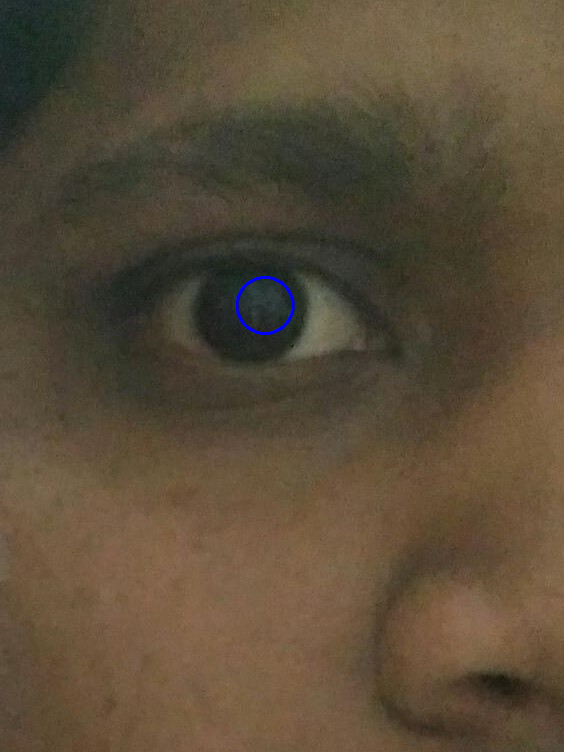

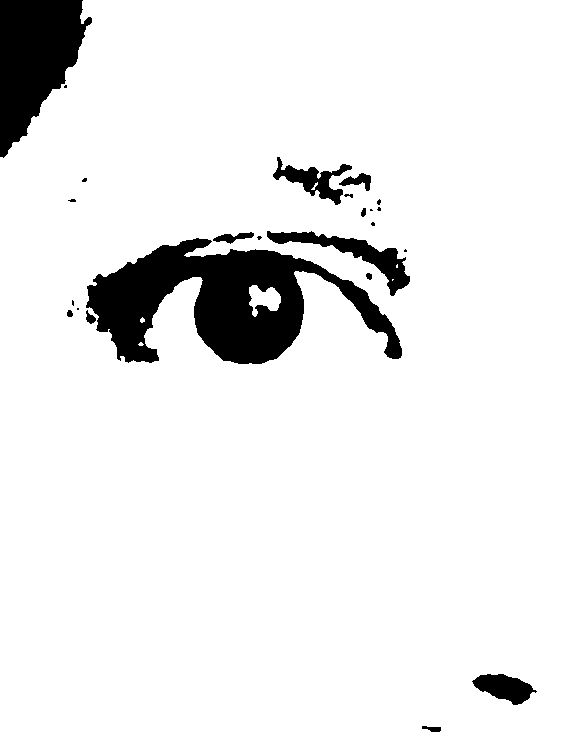

In [0]:
#import numpy 
import cv2
import operator
import numpy as np
from google.colab.patches import cv2_imshow

class pupil_detection():
    def __init__(self, image_path):
        '''
        initialize the class and set the class attributes
        '''
        self._img = None
        self._img_path = image_path
        self._pupil = None
        self._centroid = None
        
    def load_image(self):
        '''
        load the image based on the path passed to the class
        it should use the method cv2.imread to load the image
        it should also detect if the file exists
        '''
        self._img = cv2.imread(self._img_path)
        # If the image doesn't exists or is not valid then imread returns None
        if type(self._img) == None:
            return False
        else:
            return True
    
    def show_image (self,img):
        cv2_imshow(img)
        cv2.waitKey(0)
    
    def centroid (self):
        # convert image to grayscale image
        gray_image = cv2.cvtColor(self._img, cv2.COLOR_BGR2GRAY)
        # convert the grayscale image to binary image
        ret,thresh = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY_INV)
        # calculate moments of binary image
        M = cv2.moments(thresh)
        # calculate x,y coordinate of center
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        self._centroid = (cX,cY)
        # cv2.circle(self._img, (cX-20, cY-50), 50, (255, 255, 255), 2)
        
    def detect_pupil (self):
        dst = cv2.fastNlMeansDenoisingColored(self._img,None,10,10,7,21)
        blur = cv2.GaussianBlur(dst,(5,5),0)
        inv = cv2.bitwise_not(blur)
        thresh = cv2.cvtColor(inv, cv2.COLOR_BGR2GRAY)
        kernel = np.ones((2,2),np.uint8)
        erosion = cv2.erode(thresh,kernel,iterations = 1)
        ret,thresh1 = cv2.threshold(erosion,210,255,cv2.THRESH_BINARY)
        cnts, hierarchy = cv2.findContours(thresh1, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
        flag = 10000
        final_cnt = None
        for cnt in cnts:
            (x,y),radius = cv2.minEnclosingCircle(cnt)
            distance = abs(self._centroid[0]-x)+abs(self._centroid[1]-y)
            if distance < flag :
                flag = distance
                final_cnt = cnt
            else:
                continue
        (x,y),radius = cv2.minEnclosingCircle(final_cnt)
        center = (int(x),int(y))
        radius = int(radius)
        cv2.circle(self._img,center,radius,(255,0,0),2)
        
        self._pupil = (center[0],center[1],radius)
        self.show_image(self._img)

    def highlight(self):
        gray_image = cv2.cvtColor(self._img, cv2.COLOR_BGR2GRAY)
        blurred = cv2.GaussianBlur(gray_image, (11, 11), 0)
        ret, thresh = cv2.threshold(blurred, 50, 255, cv2.THRESH_BINARY)
        cv2_imshow(thresh)
        cv2.waitKey(0)
    
    def start_detection(self):
        if(self.load_image()):
            self.centroid()
            self.detect_pupil()
            self.highlight()
        else:
            print('Image file "' + self._img_path + '" could not be loaded.')
        
id = pupil_detection(r'/content/gdrive/My Drive/P11.jpg')
id.start_detection()